# TFM. Modelo predictivo llamadas Call Center
## Notebook 2 - Importación datos de llamadas

## Importacion de librerias 

In [1]:
import pandas as pd
pd.options.display.max_columns = None

### Importacion de los datos de llamadas por oficinas

In [2]:
df_calls = pd.read_csv('data/new_calls.csv', low_memory=False)

In [3]:
df_calls.columns

Index(['Unnamed: 0', 'IDCAMPANYA', 'IDSUJETO', 'VALOR', 'DATACREACIO'], dtype='object')

In [4]:
df_calls = df_calls[['IDCAMPANYA','VALOR','DATACREACIO']]
df_calls.head()

,IDCAMPANYA,VALOR,DATACREACIO
0,100000021,No tiene Numero,2019-01-02 08:06:49
1,100000022,Recogida,2019-01-02 08:08:18
2,100000015,Estado de Pedido,2019-01-02 08:09:06
3,100000015,Recogida,2019-01-02 08:13:47
4,100000015,No tiene Numero,2019-01-02 08:15:15


In [5]:
df_calls['tCreacion'] = pd.to_datetime(df_calls['DATACREACIO'])

df_calls['Date'] = df_calls['tCreacion'].dt.date
df_calls['Date'] = df_calls['Date'].astype('str')

df_calls['dateCreacion'] = df_calls['tCreacion'].dt.date
df_calls['dateCreacion'] = df_calls['dateCreacion'].astype('str')

In [6]:
df_calls.head()

,IDCAMPANYA,VALOR,DATACREACIO,tCreacion,Date,dateCreacion
0,100000021,No tiene Numero,2019-01-02 08:06:49,2019-01-02 08:06:49,2019-01-02,2019-01-02
1,100000022,Recogida,2019-01-02 08:08:18,2019-01-02 08:08:18,2019-01-02,2019-01-02
2,100000015,Estado de Pedido,2019-01-02 08:09:06,2019-01-02 08:09:06,2019-01-02,2019-01-02
3,100000015,Recogida,2019-01-02 08:13:47,2019-01-02 08:13:47,2019-01-02,2019-01-02
4,100000015,No tiene Numero,2019-01-02 08:15:15,2019-01-02 08:15:15,2019-01-02,2019-01-02


In [7]:
df_calls = df_calls[['Date','dateCreacion','IDCAMPANYA','VALOR']]

### Filtramos campaña

In [8]:
df_calls = df_calls.groupby(['Date','IDCAMPANYA','VALOR']).count()

In [9]:
df_calls.head()

dateCreacion
Date       IDCAMPANYA VALOR                         
2019-01-02 100000015  Estado de Pedido            69
                      Informacion                 38
                      No tiene Numero             17
                      Recogida                    43
           100000021  Estado de Pedido            83

In [10]:
df_calls = df_calls.reset_index()

In [11]:
df_calls.head()

,Date,IDCAMPANYA,VALOR,dateCreacion
0,2019-01-02,100000015,Estado de Pedido,69
1,2019-01-02,100000015,Informacion,38
2,2019-01-02,100000015,No tiene Numero,17
3,2019-01-02,100000015,Recogida,43
4,2019-01-02,100000021,Estado de Pedido,83


In [12]:
df = df_calls.head(1)
df['VALOR'].values

array(['Estado de Pedido'], dtype=object)

In [13]:
#df_calls = df_calls[df_calls['IDCAMPANYA'] == 100000015] ### Si filtramos por campaña
df_calls = df_calls[(df_calls['VALOR'] == 'Estado de Pedido') | (df_calls['VALOR'] == 'No tiene Numero')]
df_calls.head()

,Date,IDCAMPANYA,VALOR,dateCreacion
0,2019-01-02,100000015,Estado de Pedido,69
2,2019-01-02,100000015,No tiene Numero,17
4,2019-01-02,100000021,Estado de Pedido,83
6,2019-01-02,100000021,No tiene Numero,21
8,2019-01-02,100000022,Estado de Pedido,28


In [14]:
#df_calls = df_calls[df_calls.dateCreacion > 20]

In [15]:
df_calls = df_calls.groupby('Date').sum()[['dateCreacion']]

In [16]:
df_calls.head()

,dateCreacion
Date,
2019-01-02,281
2019-01-03,283
2019-01-04,351
2019-01-07,173
2019-01-08,174


In [17]:
df_calls.to_pickle('./data/df_Call')

<ipython-input-19-fbec284fa44f>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


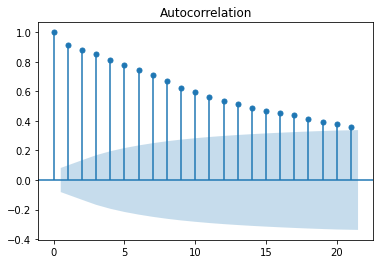

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plot_acf(df_calls['dateCreacion'], lags=21, alpha=0.05)
fig.show()

<AxesSubplot:>

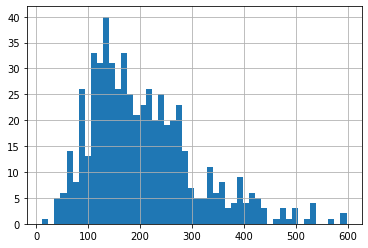

In [21]:
df_calls['dateCreacion'].hist(bins=50)

In [22]:
df_calls['dateCreacion'].describe()

count    575.000000
mean     205.789565
std      103.396648
min       11.000000
25%      130.000000
50%      185.000000
75%      259.000000
max      598.000000
Name: dateCreacion, dtype: float64